In [3]:
## Import functions
import os
import openpyxl
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import json
from llm_demos.llama2.embeddings import llama_embed
from llm_demos.llama2.gguf import importance_f, classification
from llm_demos.llama2.class_prompt import classification_prompt
from llm_demos.llama2.prompt1 import class_prompt
from llm_demos.llama2.prompt2 import uptake_prompt
from llm_demos.llama2.prompt3 import question_prompt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

llama_model_loader: loaded meta data with 22 key-value pairs and 291 tensors from /home/frattitamayo/.cache/huggingface/hub/models--NousResearch--Hermes-2-Pro-Mistral-7B-GGUF/snapshots/594e3e33f57a2b8693972e6bf48ae4eff404f170/Hermes-2-Pro-Mistral-7B.Q5_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = jeffq
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:

Wrapping
[[ 0.00456122 -0.0056079   0.0126014  ...  0.00654539 -0.01670619
   0.00164316]] (1, 4096)


llama_model_loader: loaded meta data with 22 key-value pairs and 291 tensors from /home/frattitamayo/.cache/huggingface/hub/models--NousResearch--Hermes-2-Pro-Mistral-7B-GGUF/snapshots/594e3e33f57a2b8693972e6bf48ae4eff404f170/Hermes-2-Pro-Mistral-7B.Q5_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = jeffq
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:

In [4]:
file_path = '/home/frattitamayo/memory_module/CodingDiscourseAnalysis/CollabWriteAnalysisTest.xlsm'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Test', parse_dates=['Message Time'])
observations = []
times = []

for index, row in df.iterrows():
    # Construct the observation for each row
    time_origin = row['Message Time']
    origin = f"Question: {row['Topic']}, Pseudonym: {row['Pseudonym']}"
    # origin = f"{row['Pseudonym']}"
    value = row['Message']
    observation = (time_origin, origin, value)
    #observation = [(origin_1, value_1), (origin_2, value_2), ..., (origin_n, value_n)]
    observations.append(observation)

In [5]:
class Observation:
    def __init__(self, time_origin, origin, value, ): # Origin, Emitter, Value
        self.time_origin = time_origin
        self.origin = origin # Where it came from
        self.value = value # What it contains

    def __str__(self,): #{self.origin}
        return "{"+ f"[{self.time_origin}] {self.origin}: \"{self.value}\"" + "}"
    
observations1 = [Observation(idx, origin, value) for idx, (time_origin, origin, value) in enumerate(observations)]
print(observations1)

[<__main__.Observation object at 0x79f1ad697d30>, <__main__.Observation object at 0x79f1ad694520>, <__main__.Observation object at 0x79f1ad6946a0>, <__main__.Observation object at 0x79f1ad694970>, <__main__.Observation object at 0x79f1ad694160>, <__main__.Observation object at 0x79f1ad694730>, <__main__.Observation object at 0x79f1ad695d20>, <__main__.Observation object at 0x79f1ad697220>, <__main__.Observation object at 0x79f1ad697880>]


In [6]:
def previousDirectionalWindow(observations):
    results = []
    for indx, (obs) in enumerate(observations):
        temp_prompt = class_prompt.replace("$MESSAGE$", observations[indx].__str__())
        if indx != 0:
            temp_prompt = temp_prompt.replace("$CONTEXT$", observations[indx-1].__str__())
        else:
            temp_prompt = temp_prompt.replace("$CONTEXT$", "No context")
        result = classification(temp_prompt)
        results.append(result)
    return results
f_result = previousDirectionalWindow(observations1)

```json
{
    "intent": "Deliberation",
    "rationale": "The message 'What happens next? What is behind the door, the lady or the tiger? Part 2: Later, the King discovers that his daughter has broken the law. How does the King respond? What happens?' indicates a deliberation intent because it is seeking discussion and decision-making about the content."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =      11.06 ms /    93 runs   (    0.12 ms per token,  8407.16 tokens per second)
llama_print_timings: prompt eval time =   44626.99 ms /  1533 tokens (   29.11 ms per token,    34.35 tokens per second)
llama_print_timings:        eval time =   13420.50 ms /    92 runs   (  145.87 ms per token,     6.86 tokens per second)
llama_print_timings:       total time =   58495.91 ms /  1625 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message 'My assumption is' indicates a discussion about interpretation or prediction of the content."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       5.41 ms /    46 runs   (    0.12 ms per token,  8510.64 tokens per second)
llama_print_timings: prompt eval time =    4777.99 ms /   155 tokens (   30.83 ms per token,    32.44 tokens per second)
llama_print_timings:        eval time =    6546.18 ms /    45 runs   (  145.47 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =   11450.29 ms /   200 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." is an interpretation of the content and therefore fits in the Deliberation category."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       7.61 ms /    63 runs   (    0.12 ms per token,  8275.32 tokens per second)
llama_print_timings: prompt eval time =    5128.45 ms /   165 tokens (   31.08 ms per token,    32.17 tokens per second)
llama_print_timings:        eval time =    9040.63 ms /    62 runs   (  145.82 ms per token,     6.86 tokens per second)
llama_print_timings:       total time =   14345.91 ms /   227 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." is a response to the question about interpretation or meaning of the content."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       7.31 ms /    61 runs   (    0.12 ms per token,  8343.59 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    8888.23 ms /    61 runs   (  145.71 ms per token,     6.86 tokens per second)
llama_print_timings:       total time =    9037.06 ms /    62 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." is a deliberation because it discusses the interpretation and meaning of the content."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       7.54 ms /    63 runs   (    0.12 ms per token,  8353.22 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9176.26 ms /    63 runs   (  145.65 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =    9331.26 ms /    64 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." is an interpretation and deliberation about the content."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       6.83 ms /    57 runs   (    0.12 ms per token,  8339.43 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    8309.79 ms /    57 runs   (  145.79 ms per token,     6.86 tokens per second)
llama_print_timings:       total time =    8451.11 ms /    58 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." is an interpretation and deliberation of the content."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       6.79 ms /    57 runs   (    0.12 ms per token,  8393.46 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    8308.57 ms /    57 runs   (  145.76 ms per token,     6.86 tokens per second)
llama_print_timings:       total time =    8447.01 ms /    58 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." is a deliberation because it discusses the interpretation of content and offers an explanation based on the context."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       8.07 ms /    68 runs   (    0.12 ms per token,  8430.45 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9909.79 ms /    68 runs   (  145.73 ms per token,     6.86 tokens per second)
llama_print_timings:       total time =   10074.47 ms /    69 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." is an interpretation and deliberation of the content."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       6.66 ms /    57 runs   (    0.12 ms per token,  8557.27 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    8295.76 ms /    57 runs   (  145.54 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =    8431.45 ms /    58 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." is a deliberation because it discusses interpretation and meaning of content."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       7.20 ms /    61 runs   (    0.12 ms per token,  8471.05 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    8876.15 ms /    61 runs   (  145.51 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =    9021.53 ms /    62 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message \"that the emphasis on barbarism implies that she sent him to the lion.\" is an interpretation and deliberation about the content."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       6.94 ms /    58 runs   (    0.12 ms per token,  8359.76 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    8468.77 ms /    58 runs   (  146.01 ms per token,     6.85 tokens per second)
llama_print_timings:       total time =    8614.52 ms /    59 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message "I agree with Cassandra's noticing "} relates to deliberation because it discusses agreeing with a previous interpretation or comment made in the discussion."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       7.71 ms /    64 runs   (    0.12 ms per token,  8301.98 tokens per second)
llama_print_timings: prompt eval time =    5362.91 ms /   172 tokens (   31.18 ms per token,    32.07 tokens per second)
llama_print_timings:        eval time =    9175.77 ms /    63 runs   (  145.65 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =   14728.04 ms /   235 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message "I agree with Cassandra's noticing "} relates to a deliberation intent because it builds upon Cassandra's previous interpretation and contributes to further discussion."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       7.80 ms /    66 runs   (    0.12 ms per token,  8457.20 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9618.21 ms /    66 runs   (  145.73 ms per token,     6.86 tokens per second)
llama_print_timings:       total time =    9777.64 ms /    67 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message \"I agree with Cassandra's noticing \" is in response to Cassandra's interpretation, indicating a deliberation on the meaning or interpretation of content."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       7.42 ms /    63 runs   (    0.12 ms per token,  8490.57 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9173.41 ms /    63 runs   (  145.61 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =    9324.55 ms /    64 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Seminar",
    "rationale": "The message 'of the author's word choice of barbarism.' relates to interpreting the content, hence falls under the Seminar intent."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       7.02 ms /    59 runs   (    0.12 ms per token,  8406.95 tokens per second)
llama_print_timings: prompt eval time =    5112.43 ms /   168 tokens (   30.43 ms per token,    32.86 tokens per second)
llama_print_timings:        eval time =    8438.41 ms /    58 runs   (  145.49 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =   13725.04 ms /   226 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Procedure",
    "rationale": "The message "Part 1: What happens next? What is behind the door, the lady or the tiger? Part 2: Later, the King discovers that his daughter has broken the law. How does the King respond? What happens?" relates to a procedure intent because it's asking for actions or events that will follow a certain situation."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =      11.86 ms /   100 runs   (    0.12 ms per token,  8429.57 tokens per second)
llama_print_timings: prompt eval time =    5130.28 ms /   163 tokens (   31.47 ms per token,    31.77 tokens per second)
llama_print_timings:        eval time =   14447.32 ms /    99 runs   (  145.93 ms per token,     6.85 tokens per second)
llama_print_timings:       total time =   19848.46 ms /   262 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "UX",
    "rationale": "The message 'I loved the addition of "' relates to user's opinion about the IMapBook interface or media, which falls under the UX category."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       6.94 ms /    59 runs   (    0.12 ms per token,  8507.57 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    8602.96 ms /    59 runs   (  145.81 ms per token,     6.86 tokens per second)
llama_print_timings:       total time =    8745.88 ms /    60 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "UX",
    "rationale": "The message \"I loved the addition of \" is expressing an opinion about the addition made by Marissa Roswell in the context, which relates to user experience (UX)."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       7.48 ms /    63 runs   (    0.12 ms per token,  8417.96 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9171.55 ms /    63 runs   (  145.58 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =    9330.04 ms /    64 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Seminar",
    "rationale": "The message 'Her lover would die and never love another.' indicates interpretation or discussion about the content."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       5.61 ms /    47 runs   (    0.12 ms per token,  8382.38 tokens per second)
llama_print_timings: prompt eval time =    4829.80 ms /   160 tokens (   30.19 ms per token,    33.13 tokens per second)
llama_print_timings:        eval time =    6699.50 ms /    46 runs   (  145.64 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =   11674.68 ms /   206 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message \"Sadly the barbaric nature of the king and princess is still alive today in crimes of passion.\" relates to a deliberation content as it discusses an interpretation of the content and its relation to current society."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       9.14 ms /    77 runs   (    0.12 ms per token,  8423.59 tokens per second)
llama_print_timings: prompt eval time =    5339.62 ms /   176 tokens (   30.34 ms per token,    32.96 tokens per second)
llama_print_timings:        eval time =   11225.24 ms /    77 runs   (  145.78 ms per token,     6.86 tokens per second)
llama_print_timings:       total time =   16788.76 ms /   253 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Procedure",
    "rationale": "The message 'Submitted' indicates an action related to completing a task or assignment, which relates to the procedure intent."
}
```


llama_print_timings:        load time =     217.79 ms
llama_print_timings:      sample time =       6.17 ms /    52 runs   (    0.12 ms per token,  8422.42 tokens per second)
llama_print_timings: prompt eval time =    5218.38 ms /   170 tokens (   30.70 ms per token,    32.58 tokens per second)
llama_print_timings:        eval time =    7434.68 ms /    51 runs   (  145.78 ms per token,     6.86 tokens per second)
llama_print_timings:       total time =   12812.19 ms /   221 tokens


In [7]:
print(f_result)

['Deliberation', 'Deliberation', 'Deliberation', 'Deliberation', 'Seminar', 'UX', 'Seminar', 'Deliberation', 'Procedure']


# Test

In [9]:
file_path = '/home/frattitamayo/memory_module/CodingDiscourseAnalysis/CollabWriteAnalysisTest.xlsm'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Test', parse_dates=['Message Time'])
y_true = []
for index, row in df.iterrows():
    val = row['R2DiscussionType']
    y_true.append(val)
print (y_true)

['Social', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Procedure']


In [13]:

y_pred = f_result

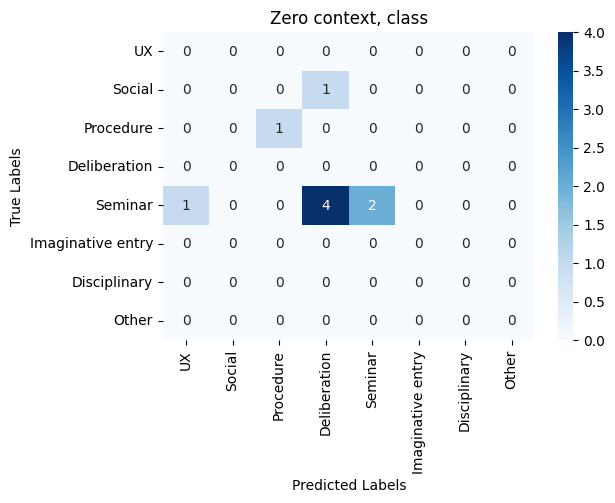

In [14]:
# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"])

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"], yticklabels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"])

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Zero context, class")

# Show the plot
plt.show()